# Notes

* Supervised Learning - same as always

# Example

* Imagine you are in a team and you want to create a drone
* in order for it to navigate safelt,y it needs to perceive obstacle
* one step is to estimate the brightness
* the drone reports the brightness
* but there are errors in the drone's camera

To address the imperfections and ensure our drone's accurate perception of brightness, we needed a way to calibrate it's sensor.  Calibration involves aligning our sstem's observation with the data

In order to do that, we collect "ground truth" data - you will hear this term a lot.

If I have "many examples" can I write a function that maps the image to an intensity?!

Probably!  If the data is good enough!


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Number of frames in the video sequence
num_frames = 10

# Initialize true brightness and video frames
true_brightness = np.zeros(num_frames)
video_frames = []

# this is the "true" training set
for frame in range(num_frames):
    true_brightness[frame] = np.random.randint(0, 256)  # True brightness (0 to 255)
    frame_content = np.ones((100, 100), dtype=np.uint8) * true_brightness[frame]
    video_frames.append(frame_content)


X = true_brightness.reshape(-1, 1) # note this is reshaped into a single column vector
# arr.reshape(-1, 1) reshapes things into as many rows as it needs but 1 column
# if you don't believe me, try this
# print(X.reshape(2, 5))  # two rows, and 5 columns
# print(X.reshape(5,2)) # 5 rows and 2 columns

[[154. 123. 220.  59. 132.]
 [ 60. 109. 204. 243.  58.]]
[[154. 123.]
 [220.  59.]
 [132.  60.]
 [109. 204.]
 [243.  58.]]


# note that the MSE is like a measurement of the variance of the population of the errors

$$\textit{MSE} = \frac{1}{n} \sum_{i = 0}^n (y_i - \hat{y}_i)^2$$

# Gradient Descent

Hooray!  It's fun!

$$\theta_i = \theta_{i - 1} - n\Delta $$

# PROBLEMS!

* initial values matter a lot
* it's non-deterministic




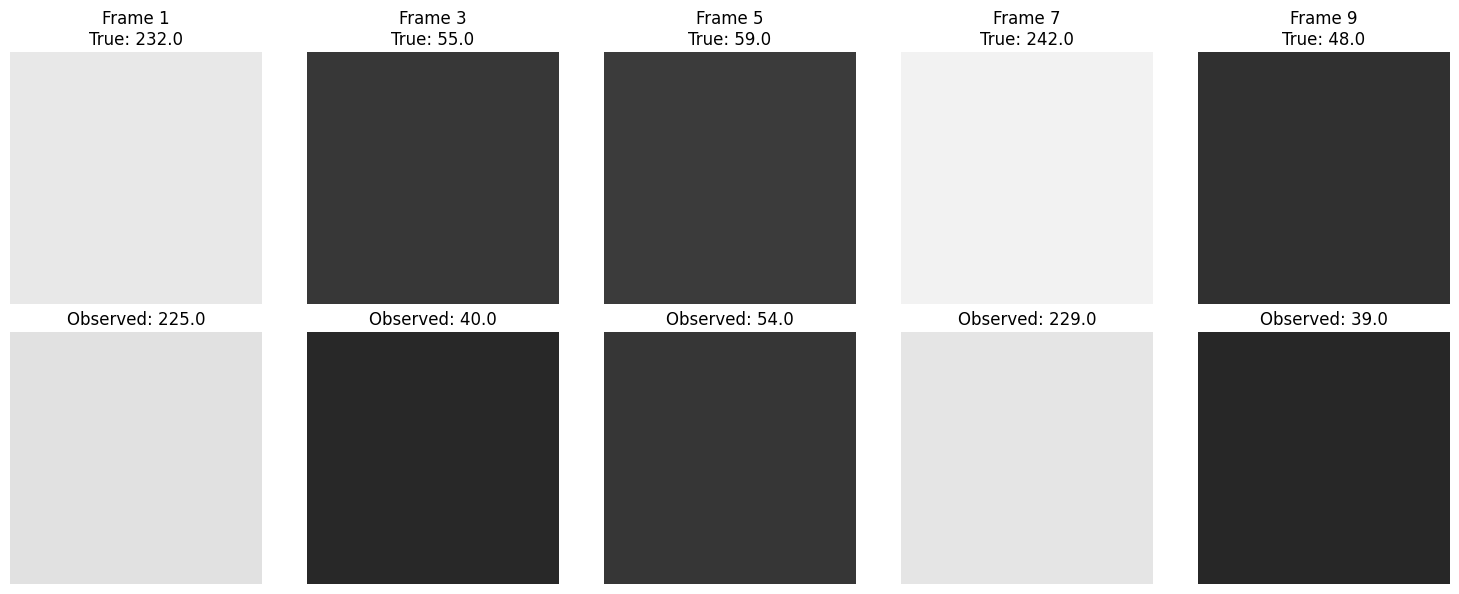

In [2]:

frames_to_display = [0, 2, 4, 6, 8]

fig, axes = plt.subplots(2, len(frames_to_display), figsize=(15, 6))


for i, frame_idx in enumerate(frames_to_display):
    axes[0, i].imshow(video_frames[frame_idx], cmap='gray', vmin=0, vmax=255)
    axes[0, i].set_title(f"Frame {frame_idx + 1}\nTrue: {true_brightness[frame_idx]}")
    axes[0, i].axis('off')


observed_frames = [frame + np.random.randint(-20, 21) for frame in true_brightness]
observed_frames = np.clip(observed_frames, 0, 255)

for i, frame_idx in enumerate(frames_to_display):
    axes[1, i].imshow(np.ones((100, 100), dtype=np.uint8) * observed_frames[frame_idx], cmap='gray', vmin=0, vmax=255)
    axes[1, i].set_title(f"Observed: {observed_frames[frame_idx]}")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


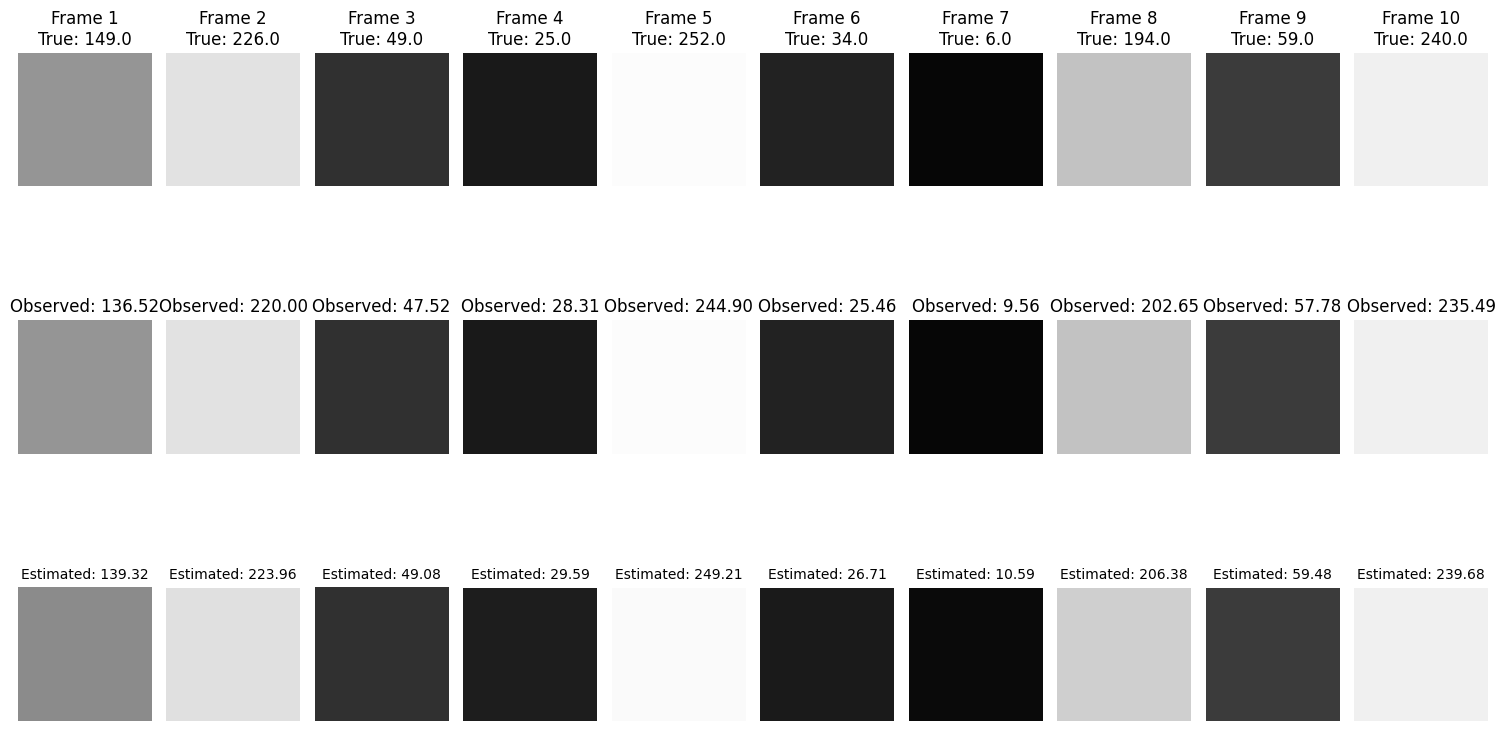

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


num_frames = 10

true_brightness = np.zeros(num_frames)
video_frames = []
observed_brightness = []

for frame in range(num_frames):
    true_brightness[frame] = np.random.randint(0, 256)
    frame_content = np.ones((100, 100), dtype=np.uint8) * true_brightness[frame]
    video_frames.append(frame_content)
    observed_brightness.append(true_brightness[frame] + np.random.normal(0, 10))

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(np.array(observed_brightness).reshape(-1, 1), true_brightness)

estimated_brightness = regression_model.predict(np.array(observed_brightness).reshape(-1, 1))

# Visualization
fig, axes = plt.subplots(3, num_frames, figsize=(15, 9))


for i in range(num_frames):
    axes[0, i].imshow(video_frames[i], cmap='gray', vmin=0, vmax=255)
    axes[0, i].set_title(f"Frame {i + 1}\nTrue: {true_brightness[i]}")
    axes[0, i].axis('off')


for i in range(num_frames):
    axes[1, i].imshow(video_frames[i], cmap='gray', vmin=0, vmax=255)
    axes[1, i].set_title(f"Observed: {observed_brightness[i]:.2f}")
    axes[1, i].axis('off')


for i in range(num_frames):
    estimated_frame = np.ones((100, 100), dtype=np.uint8) * estimated_brightness[i]
    axes[2, i].imshow(estimated_frame, cmap='gray', vmin=0, vmax=255)
    axes[2, i].set_title(f"Estimated: {estimated_brightness[i]:.2f}", fontsize=10)
    axes[2, i].axis('off')

plt.tight_layout()
plt.show()


Theta0 (Intercept): 0.89
Theta1 (Slope): 1.01


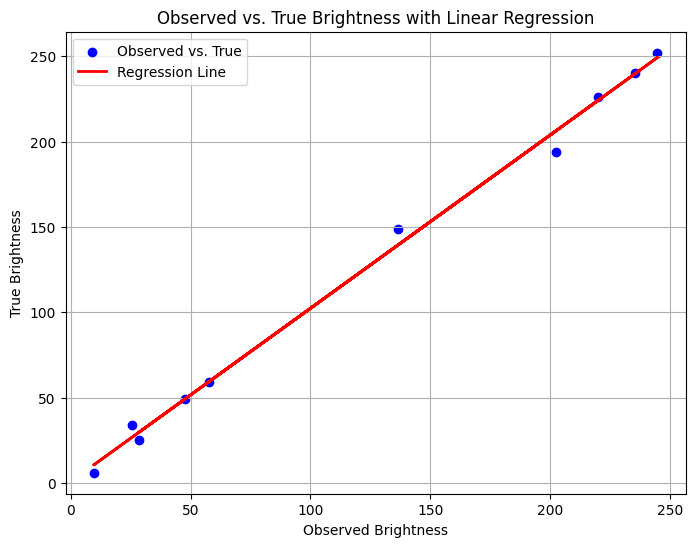

In [4]:
# Access the intercept (theta0) and coefficient (theta1) values
theta0 = regression_model.intercept_
theta1 = regression_model.coef_[0]

print(f"Theta0 (Intercept): {theta0:.2f}")
print(f"Theta1 (Slope): {theta1:.2f}")

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(observed_brightness, true_brightness, c='blue', marker='o', label='Observed vs. True')
plt.plot(observed_brightness, theta0 + theta1 * np.array(observed_brightness), color='red', linewidth=2, label='Regression Line')
plt.title("Observed vs. True Brightness with Linear Regression")
plt.xlabel("Observed Brightness")
plt.ylabel("True Brightness")
plt.legend()
plt.grid(True)

plt.show()